In [1]:
# loading the things...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
# overriding the defaults for pandas: display.max_rows
pd.set_option("display.max_rows", None, "display.max_columns", None)

# loading in the data
test_data = pd.read_csv ('../data/raw/test.csv')
df = pd.read_csv("../data/raw/train.csv")

# combining the datasets
df = pd.concat([df, test_data])   # Wow, that was easy!

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Checking out the visual context of the data

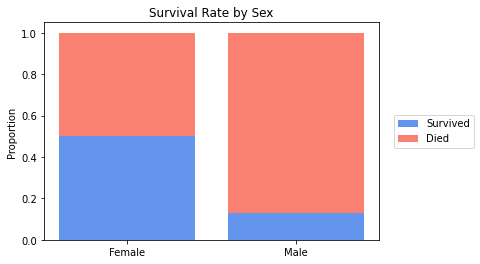

In [4]:
#source: https://drbeane.github.io/_pages/courses/dsci356/12%20-%20Titanic%20Dataset.html

female_survival_rate = np.sum((df.Sex == 'female') & (df.Survived == 1)) / np.sum(df.Sex == 'female')
male_survival_rate = np.sum((df.Sex == 'male') & (df.Survived == 1)) / np.sum(df.Sex == 'male')
sex_survival_rates = np.array([female_survival_rate, male_survival_rate])
sex_death_rates = 1 - sex_survival_rates

plt.figure(figsize=[6,4])
plt.bar(range(2),sex_survival_rates, label='Survived', color='cornflowerblue')
plt.bar(range(2),sex_death_rates, label='Died', bottom=sex_survival_rates, color='Salmon')
plt.legend(loc="center left", bbox_to_anchor=(1.03,0.5))
plt.xticks(range(2), ['Female', 'Male'])
plt.ylabel('Proportion')
plt.title('Survival Rate by Sex')
plt.show()

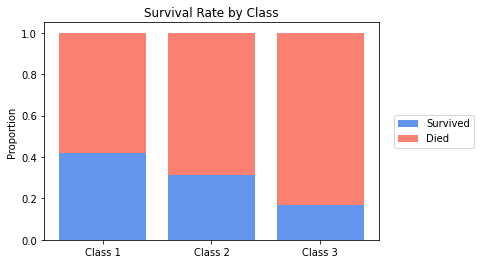

In [5]:
class1_survival_rate = np.sum((df.Pclass == 1) & (df.Survived == 1)) / np.sum(df.Pclass == 1)
class2_survival_rate = np.sum((df.Pclass == 2) & (df.Survived == 1)) / np.sum(df.Pclass == 2)
class3_survival_rate = np.sum((df.Pclass == 3) & (df.Survived == 1)) / np.sum(df.Pclass == 3)
class_survival_rates = np.array([class1_survival_rate, class2_survival_rate, class3_survival_rate])
class_death_rates = 1 - class_survival_rates

plt.figure(figsize=[6,4])
plt.bar(range(3),class_survival_rates, label='Survived', color='cornflowerblue')
plt.bar(range(3),class_death_rates, label='Died', bottom=class_survival_rates, color='Salmon')
plt.legend(loc="center left", bbox_to_anchor=(1.03,0.5))
plt.xticks(range(3), ['Class 1', 'Class 2', 'Class 3'])
plt.ylabel('Proportion')
plt.title('Survival Rate by Class')
plt.show()

In [6]:
df['Title']=df.Name.str.extract('([A-Za-z]+)\.') 
df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col',
                         'Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

df.loc[(df.Age.isnull())&(df.Title=='Mr'),'Age'] = df.Age[df.Title == "Mr"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Mrs'),'Age'] = df.Age[df.Title == "Mrs"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Master'),'Age'] = df.Age[df.Title == "Master"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Miss'),'Age'] = df.Age[df.Title == "Miss"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Other'),'Age'] = df.Age[df.Title == "Other"].mean()
df = df.drop('Name', axis=1)

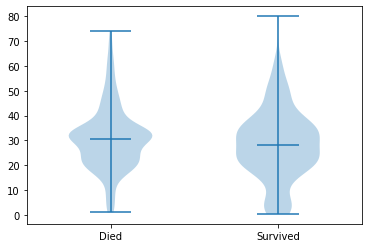

In [7]:
plt.violinplot([df.Age.values[df.Survived == 0], df.Age.values[df.Survived == 1]], showmeans=True)
plt.xticks(range(3), ['', 'Died', 'Survived'])
plt.xlim(0.5, 2.5)
plt.show()

This might be good to inform our age classifications in Feature Engineering - Ages

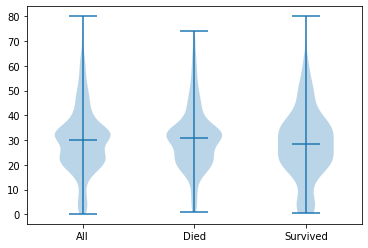

In [8]:
plt.violinplot([df.Age.values, df.Age.values[df.Survived == 0], df.Age.values[df.Survived == 1]], showmeans=True)
plt.xticks(range(4), ['', 'All', 'Died', 'Survived'])
plt.xlim(0.5, 3.5)
plt.show()

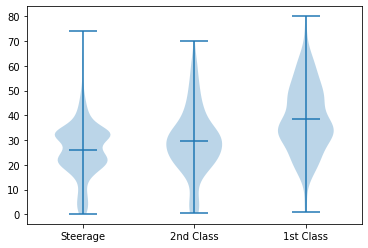

In [9]:
plt.violinplot([df.Age.values[df.Pclass == 3], df.Age.values[df.Pclass == 2], df.Age.values[df.Pclass == 1]], showmeans=True)
plt.xticks(range(4), ['', 'Steerage', '2nd Class', '1st Class'])
plt.xlim(0.5, 3.5)
plt.show()

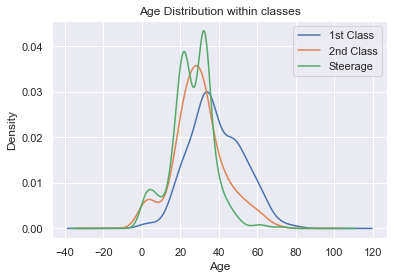

In [20]:
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','Steerage'),loc='best') ;

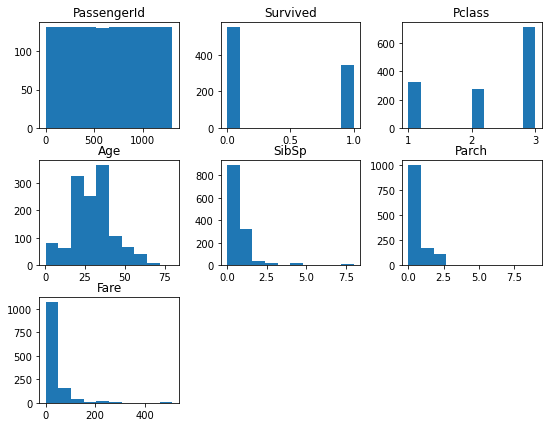

In [11]:
df.hist(bins=10,figsize=(9,7),grid=False);

C:\Users\lyndo\AppData\Local\Temp\ipykernel_16576\3124943351.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()#["Survived"]


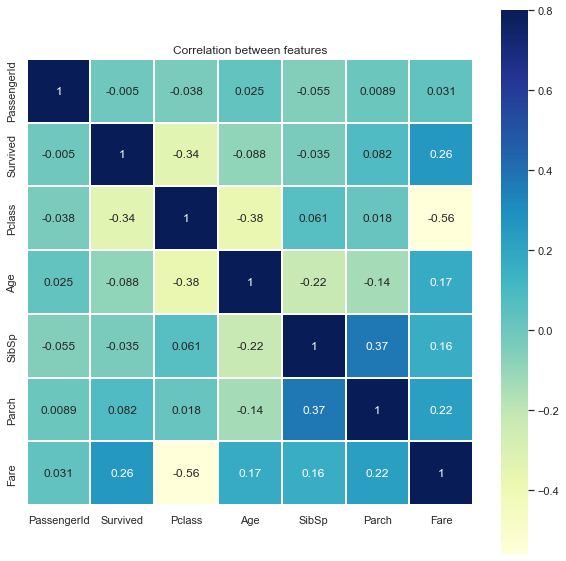

In [21]:
corr=df.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

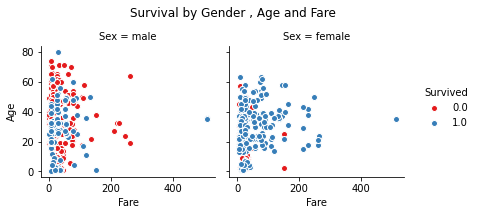

In [12]:
g = sns.FacetGrid(df, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict())
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');

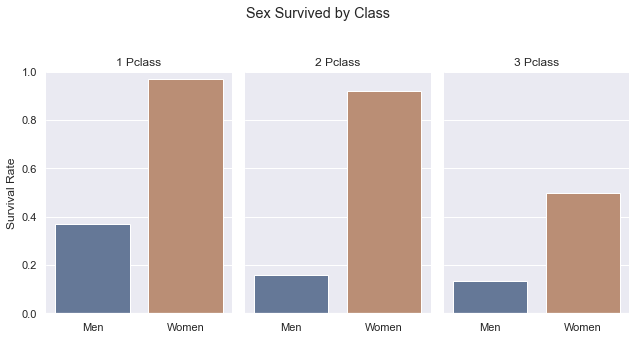

In [15]:
sns.set(font_scale=1)
g = sns.catplot(x="Sex", y="Survived", col="Pclass",
                    data=df, saturation=.5,
                    kind="bar", errorbar=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Sex Survived by Class');

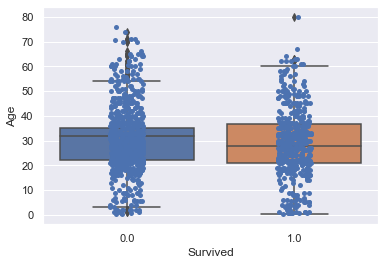

In [18]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=df)
ax = sns.stripplot(x="Survived", y="Age",
                   data=df, jitter=True,
                   edgecolor="gray")